In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-06 00:00:00+09:00,28182.310547,28734.789062,28118.740234,28143.970703,386300000,0.0,0.0
2023-03-13 00:00:00+09:00,27886.210938,27906.970703,26632.919922,27333.789062,517000000,0.0,0.0
2023-03-20 00:00:00+09:00,27253.730469,27520.970703,26945.669922,27385.250000,280900000,0.0,0.0
2023-03-27 00:00:00+09:00,27482.390625,28124.619141,27359.720703,28041.480469,380700000,0.0,0.0
2023-04-03 00:00:00+09:00,28203.349609,28287.419922,27427.660156,27518.310547,344900000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,768100000,0.0,0.0
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-02 00:00:00+09:00,20897.199219,21399.869141,20613.910156,20749.750000,292000000,0.0,0.0
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,16690.599609,17431.050781,862200000,0.0,0.0
2020-03-16 00:00:00+09:00,17586.080078,17785.759766,16358.190430,16552.830078,733000000,0.0,0.0
2020-03-23 00:00:00+09:00,16570.570312,19564.380859,16480.949219,19389.429688,742300000,0.0,0.0
2020-03-30 00:00:00+09:00,18884.070312,19336.189453,17646.500000,17820.189453,552300000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,768100000,0.0,0.0
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-02 00:00:00+09:00,20897.199219,21399.869141,20613.910156,20749.750000,292000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,16690.599609,17431.050781,862200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-16 00:00:00+09:00,17586.080078,17785.759766,16358.190430,16552.830078,733000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00+09:00,16570.570312,19564.380859,16480.949219,19389.429688,742300000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00+09:00,18884.070312,19336.189453,17646.500000,17820.189453,552300000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,768100000,0.0,0.0,38645.330078,38099.011719,39492.888672,36008.196289,41583.704102
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,573400000,0.0,0.0,38674.824219,38226.986328,39492.888672,36328.132812,41391.742188
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0,38744.458984,38303.956055,39492.888672,36520.557129,41276.287598


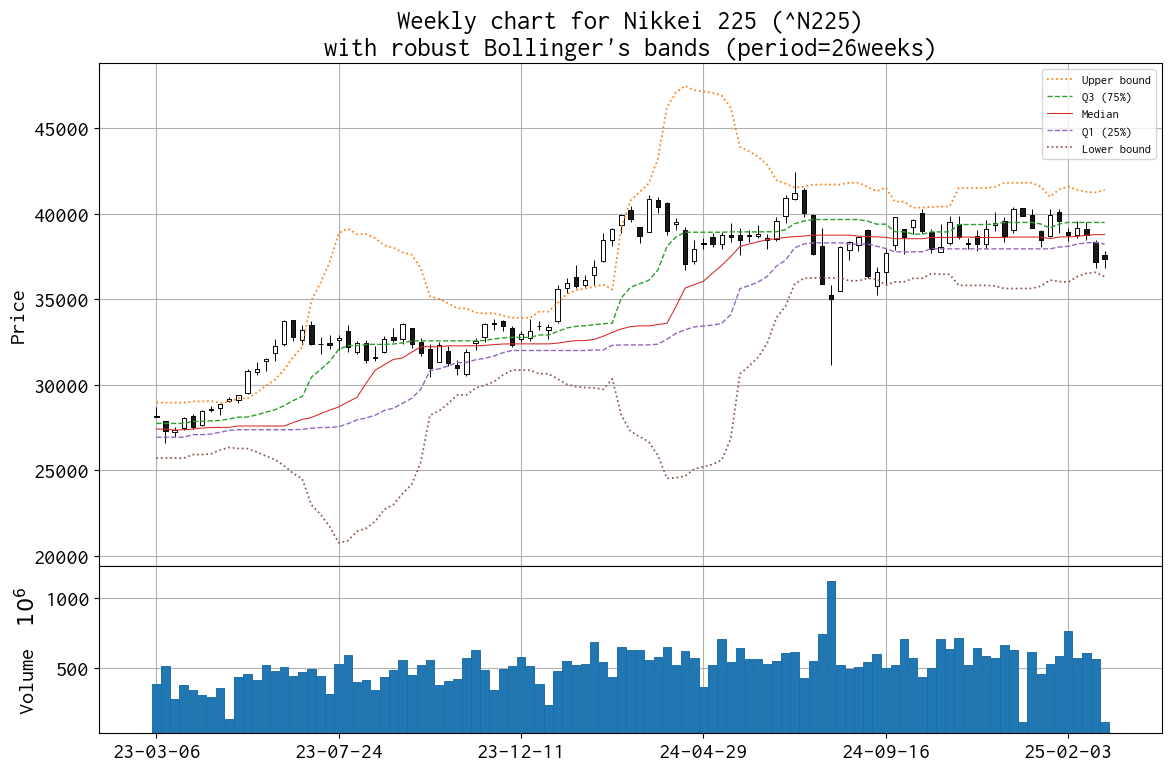

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00+09:00,39094.089844,39508.550781,38456.531250,38776.941406,606900000,0.0,0.0
2025-02-24 00:00:00+09:00,38359.671875,38485.949219,37084.441406,37173.460938,253700000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00+09:00    38776.941406
2025-02-24 00:00:00+09:00    37173.460938
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00+09:00            NaN
2025-02-24 00:00:00+09:00   -1603.480469
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00+09:00   -1186.210938
dtype: float64

In [9]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00+09:00    39170.823317
2025-02-03 00:00:00+09:00    39115.950120
2025-02-10 00:00:00+09:00    39154.913161
2025-02-17 00:00:00+09:00    39192.843149
2025-02-24 00:00:00+09:00    39113.260817
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00+09:00    38578.379207
2025-02-03 00:00:00+09:00    38723.072266
2025-02-10 00:00:00+09:00    38764.870643
2025-02-17 00:00:00+09:00    38780.742638
2025-02-24 00:00:00+09:00    38724.039213
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00+09:00    38738.726262
2025-02-03 00:00:00+09:00    38775.064678
2025-02-10 00:00:00+09:00    38787.799129
2025-02-17 00:00:00+09:00    38781.611854
2025-02-24 00:00:00+09:00    38728.970328
Name: Close, dtype: float64

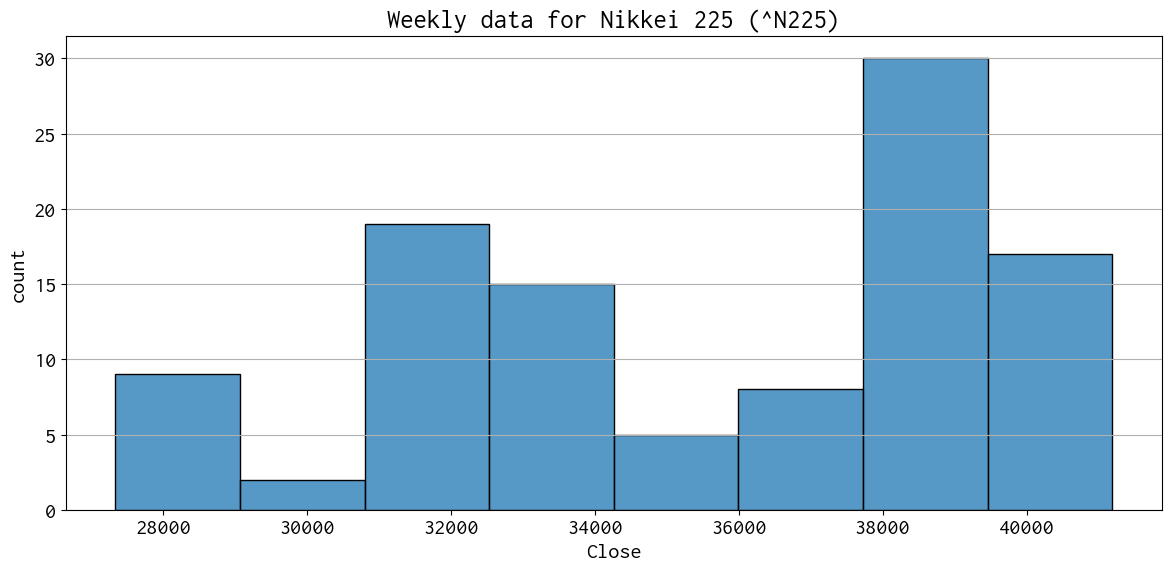

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

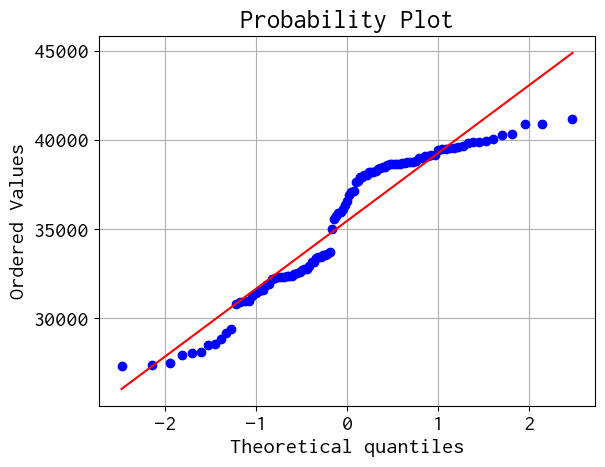

In [14]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [15]:
len(df)

105

In [16]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9086552808157939, p-value: 2.271840026906821e-06
